# Week 8 Wednesday

## Announcements

* This week's videos posted (due Friday before lecture).
* No discussion section until the strike is resolved.
* If you weren't able to get the pickle file from Worksheet 12 submitted, include a link to your Deepnote notebook as a comment on the Canvas Worksheet 12 assignment (be sure to change the sharing options so I can see your Worksheet 12) and I will try to give partial credit.
* I have office hours today (Wednesday) at 1pm in my office, RH 440J.
* Course project instructions have been added to the [course notes](https://christopherdavisuci.github.io/UCI-Math-10-F22/Proj/CourseProject.html).  A "warm-up" homework for the course project is Worksheet 16, posted in the Week 9 folder.

## Rough plan for the next few classes:

Very subject to change.

* Week 8 Wednesday (today): The U-shaped test error curve
* Week 8 Friday: More on decision trees.  (I probably have too much planned for today, so we can catch up on Friday.)
* Week 9 Monday: Random forests (ensembles of decision trees)
* Week 9 Wednesday: Introduction to the course project

## Loading the iris dataset

The iris dataset (also available from Seaborn) is smaller than most of the datasets we work with in Math 10 (it only contains 150 rows/observations/data points).  But it is one of the most classic datasets in Machine Learning, so we should see it at some point.

In [1]:
import pandas as pd
import seaborn as sns
import altair as alt

In [2]:
df = sns.load_dataset("iris")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Splitting the data into a training set and a test set

In [4]:
from sklearn.model_selection import train_test_split

* Use `train_test_split` to divide the iris data into a training set and a test set.  Use 80% of the rows for the training data, and specify `random_state=2`.
* On Monday, we made `X_train, X_test, y_train, y_test`.  This time we will just make `df_train` and `df_test` (so the input features and the target are not separated yet).

In [5]:
df_train, df_test = train_test_split(df, train_size=0.8, random_state=2)

The resulting training DataFrame is definitely not just the first 80% of rows.  In fact, the order of the rows is also scrambled.  Here are the first 3 rows in the training DataFrame.

In [6]:
df_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
126,6.2,2.8,4.8,1.8,virginica
23,5.1,3.3,1.7,0.5,setosa
64,5.6,2.9,3.6,1.3,versicolor


The reason we divide into a training set and a test set is that can help us detect overfitting.  In short, if the Machine Learning model performs much better on the training set than on the test set, that is strong evidence of overfitting.

There was a question of what "much better" performance means, and in most scenarios I believe this is more art than science, but here is a picture of the general phenomenon.  This picture is taken from the great textbook (freely available on campus via SpringerLink) [Introduction to Statistical Learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7).

![U-shaped test error curve](../images/Ushape-test-error.png)

It is the image on the right that you should pay attention to.  That image is for Mean Squared Error, but any error function (cost function, loss function) would work just as well.  We generally start with a less flexible model (in polynomial regression, this means lower degree; in decision trees, this means fewer leaves).  As we make the model more flexible, the performance on the training set will always improve (the error will decrease).  Typically the test error curve also begins to decrease, but eventually, once overfitting starts, the test error will start to increase again.  The resulting curve is called the "U-shaped test error" curve.  We will see examples of this phenomenon in Worksheet 14 and also in class on Friday.

## Visualizing how a decision tree splits the data

Our goal is to divide the iris data by species.

* First we will divide by petal length.
* Then we will divide by petal width.
* Where would you make these divisions?

Use the following to visualize the data:
```
alt.Chart(???not df).mark_circle(size=50, opacity=1).encode(
    x="petal_length",
    y="petal_width",
    color=alt.Color("species", scale=alt.Scale(domain=["versicolor", "setosa", "virginica"])),
)
```

In [7]:
alt.Chart(df_train).mark_circle(size=50, opacity=1).encode(
    x="petal_length",
    y="petal_width",
    color=alt.Color("species", scale=alt.Scale(domain=["versicolor", "setosa", "virginica"])),
)

alt.Chart(...)

I think dividing the region at petal_length 2.5 or petal_width 0.7 would be equally reasonable.  We have been told the first division should happen by petal length.  This initial division perfectly separates the setosa flowers from the other two species.  The next division we are told should be by petal width.  A division around 1.7 seems to do a good job (but not a perfect job) dividing the versicolor flowers from the virginica flowers.

* How many "leaves" will the corresponding decision tree have?

The answer is three.  We initially divide the region in half vertically, and then we divide the right-half region again in half horizontally.

## A Decision tree with two splits



In [8]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

* Create an instance of a `DecisionTreeClassifier` with `max_leaf_nodes` as above.  Specify `random_state=1` (which will help me know that the first split happens on "petal_length"... if it doesn't work, try some other values of `random_state`).
* Fit the classifier to the training data using `cols = ["petal_length", "petal_width", "sepal_length"]` for the input features and using `"species"` for the target.

In [9]:
cols = ["petal_length", "petal_width", "sepal_length"]

In [10]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=1)

In [11]:
clf.fit(df_train[cols], df_train["species"])

DecisionTreeClassifier(max_leaf_nodes=3, random_state=1)

* Illustrate the resulting tree using the following.
* Does it match what we expected from the Altair chart?
```
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)
```

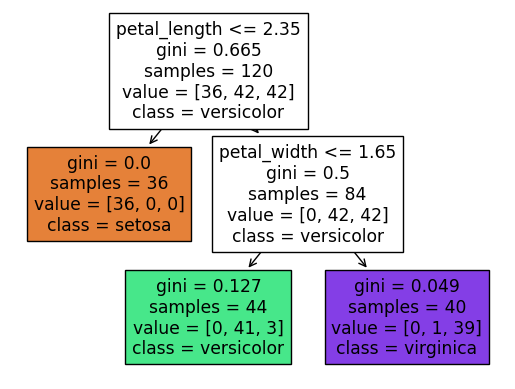

In [12]:
fig = plt.figure()
_ = plot_tree(clf, 
                   feature_names=clf.feature_names_in_,
                   class_names=clf.classes_,
                   filled=True)

Notice how these values 2.35 and 1.65 closely match what we saw above.  Also notice how the setosa flowers are perfectly separated (that corresponds to the `value = [36, 0, 0]` report, whereas there is some overlap in the other two species.  If you look back up to the Altair chart, it should seem plausible that the lower-right region (where petal length is greater than 2.35 and where petal width is less than or equal to 1.65) contains exactly 3 of the virginica species.  That is represented in the `value = [0, 41, 3]`.  The classes are (I believe) always listed in alphabetical order, but if you want to check it, you can also call `clf.classes_`.

* What is the depth of the corresponding tree?  We can answer by looking at the diagram, or by using the `get_depth` method.

In [13]:
clf.get_depth()

2

* What are the corresponding feature importances?  Use the `feature_importances_` attribute.

In [14]:
clf.feature_importances_

array([0.52311757, 0.47688243, 0.        ])

In [15]:
pd.Series(clf.feature_importances_)

0    0.523118
1    0.476882
2    0.000000
dtype: float64

Here we use the `feature_names_in_` attribute to know which number corresponds to which column.  I don't know exactly what these numbers 0.523 and 0.477 represent, but higher values means more important (for the decision tree).  The 0 value for sepal_length makes sense, because our small decision tree (which only had two splits) never used the sepal length value.

In [16]:
pd.Series(clf.feature_importances_, index=clf.feature_names_in_)

petal_length    0.523118
petal_width     0.476882
sepal_length    0.000000
dtype: float64

## Predictions and predicted probabilities

* What species will be predicted for an iris with the following (physically impossible) values?
```
{"petal_length": 4, "petal_width": -5, "sepal_length": 3}
```
* What are the corresponding predicted probabilities?

Notice how we have to add square brackets around the dictionary; this is like telling pandas that it will be a one-row DataFrame (because the list has only one dictionary in it).

In [17]:
df_mini = pd.DataFrame([{"petal_length": 4, "petal_width": -5, "sepal_length": 3}])
df_mini

,petal_length,petal_width,sepal_length
0,4,-5,3


Even though this flower does not exist in real life (for example because of the -5 value), the classifier has no trouble evaluating it.  Because the petal length value is greater than 2.35 and the petal width value is less than 1.65, we are in the exact same lower-right region we were discussing above, which corresponded to a *versicolor* prediction.

In [18]:
clf.predict(df_mini)

array(['versicolor'], dtype=object)

For a more refined prediction, we can get predicted probabilities, rather than just the final answer.  The classes will be listed in alphabetical order.

In [20]:
clf.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

So our classifier thinks there is a 93.2% chance that our flower is in the versicolor species.

In [19]:
clf.predict_proba(df_mini)

array([[0.        , 0.93181818, 0.06818182]])

Where did those numbers come from?  Remember that our lower-right region contained 41 versicolor flowers, 3 virginica flowers, and 0 setosa flowers.  For example, that 93.2% corresponds to the probability 41/(0+41+3).

In [21]:
41/44

0.9318181818181818

We didn't get to the following.  We will either start there or start with a similar example of the U-shaped test error curve on Friday.

## The U-shaped test error curve

We haven't used `df_test` yet.  Here we will.  We will use a loss function that is commonly used for classification problems, **log loss** (also called **cross entropy**).  If you want to see the mathematical description, I have it in the [Spring 2022 course notes](https://christopherdavisuci.github.io/UCI-Math-10-S22/Week9/Week9-Monday.html#a-loss-function-for-classification), but for us the most important thing is that lower values are better (as with Mean Squared Error and Mean Absolute Error) and that this is a loss function for classification (not for regression).

In [39]:
from sklearn.metrics import log_loss

* Define two empty dictionaries, `train_dict` and `test_dict`.

For each integer value of `n` from `2` to `9` (inclusive), do the following. 
* Instantiate a new `DecisionTreeClassifier` using `max_leaf_nodes` as `n` and using `random_state=1`.
* Fit the regressor using `df_train[cols]` and `df_train["species"]`.
* Using `log_loss` from `sklearn.metrics`, evaluate the log loss (error) between `df_train["species"]` and the predicted probabilities.  (These two objects need to be input to `log_loss` in that order, with the true values first, followed by the predicted probabilities.)  Put this error as a value into the `train_dict` dictionary with the key `n`.
* Do the same thing with `df_test` and `test_dict`.

* How do the values in `train_dict` and `test_dict` compare?
* At what point does the classifier seem to begin overfitting the data?